<a href="https://colab.research.google.com/github/mridulhalder/Springboard/blob/main/MiniProject_Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42
)

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

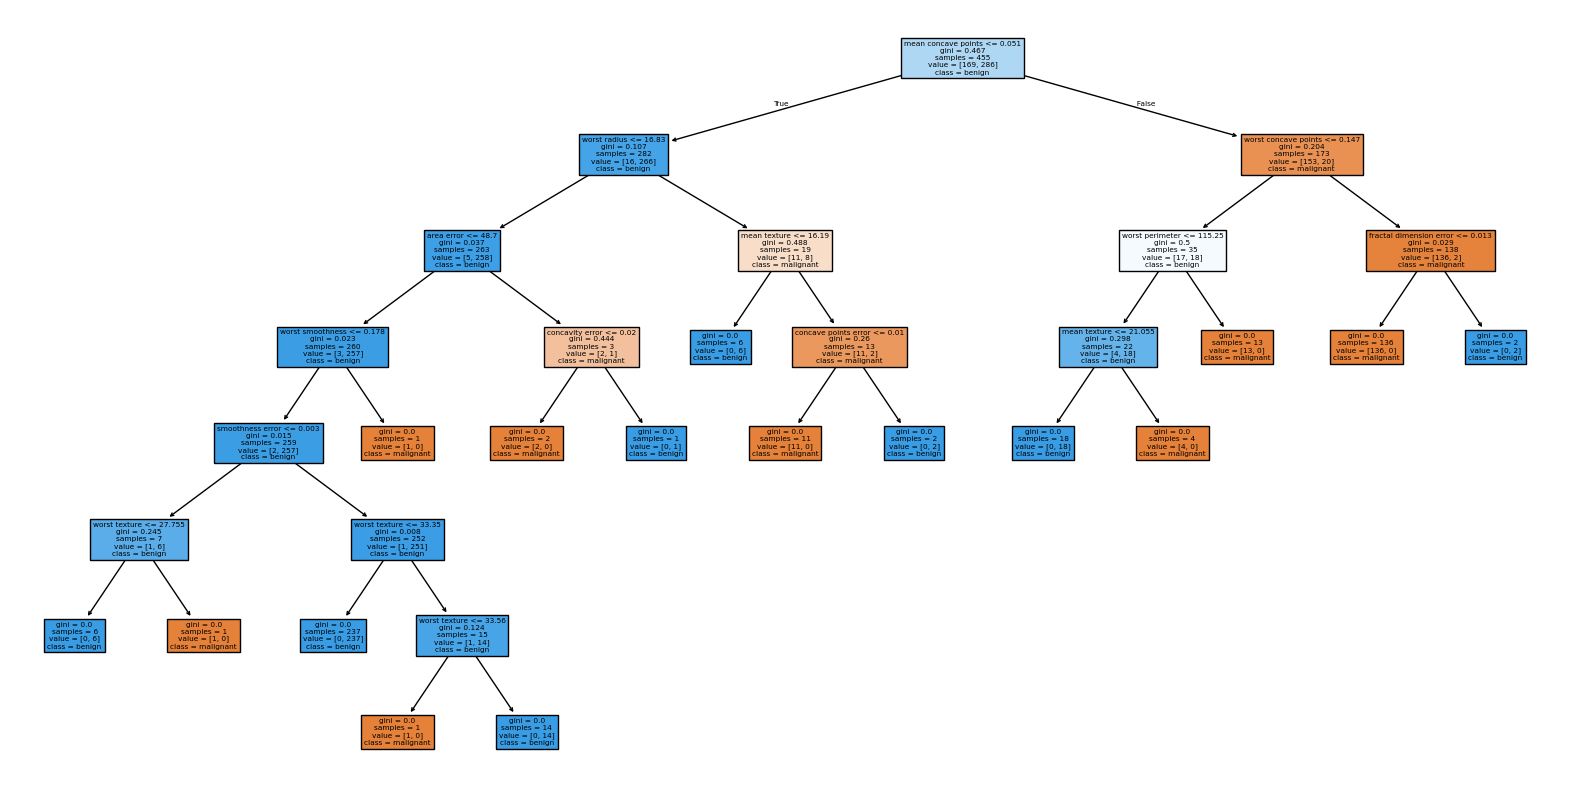

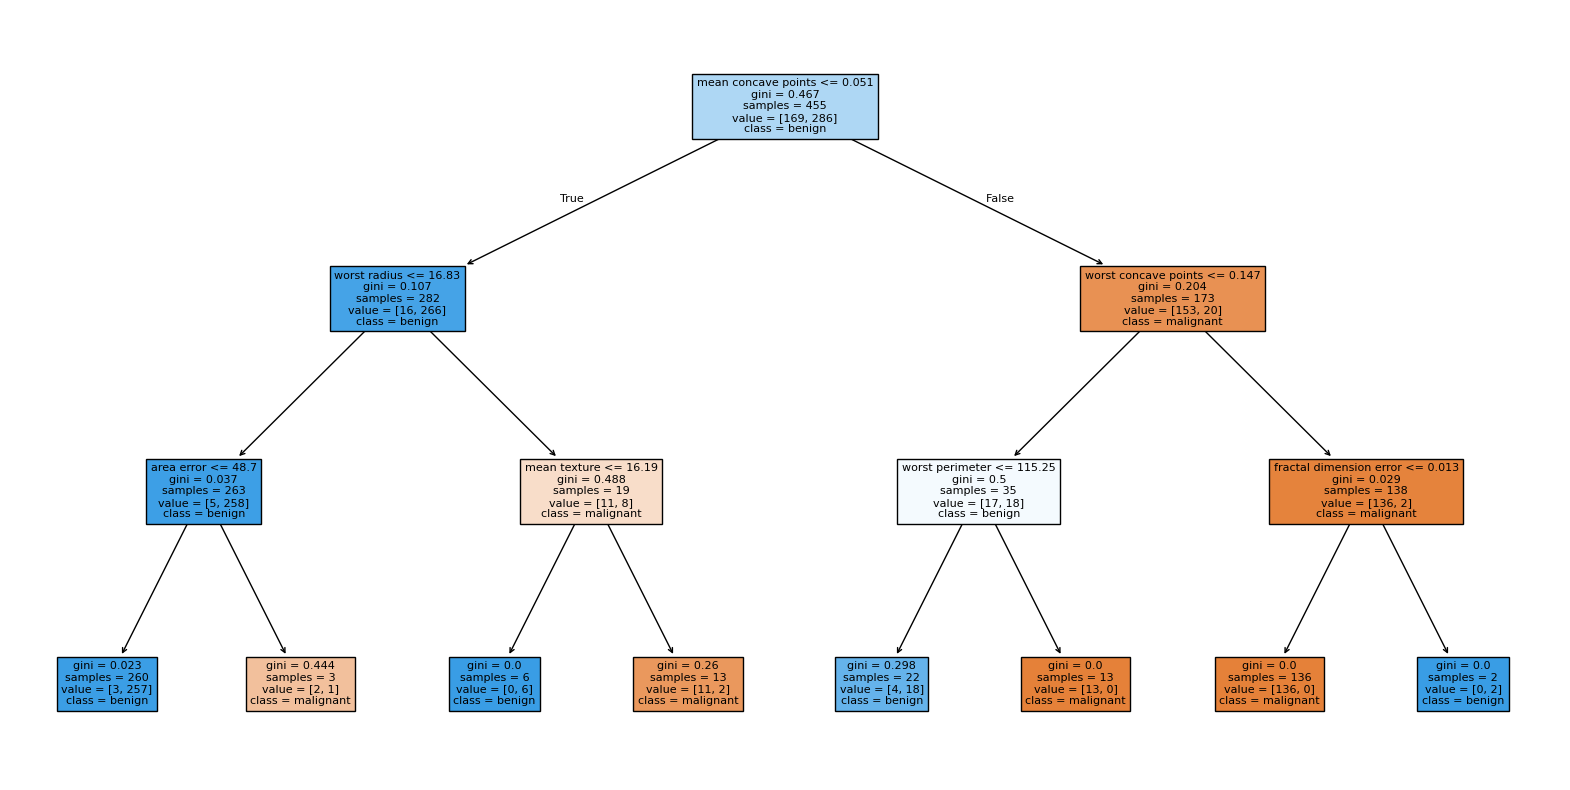

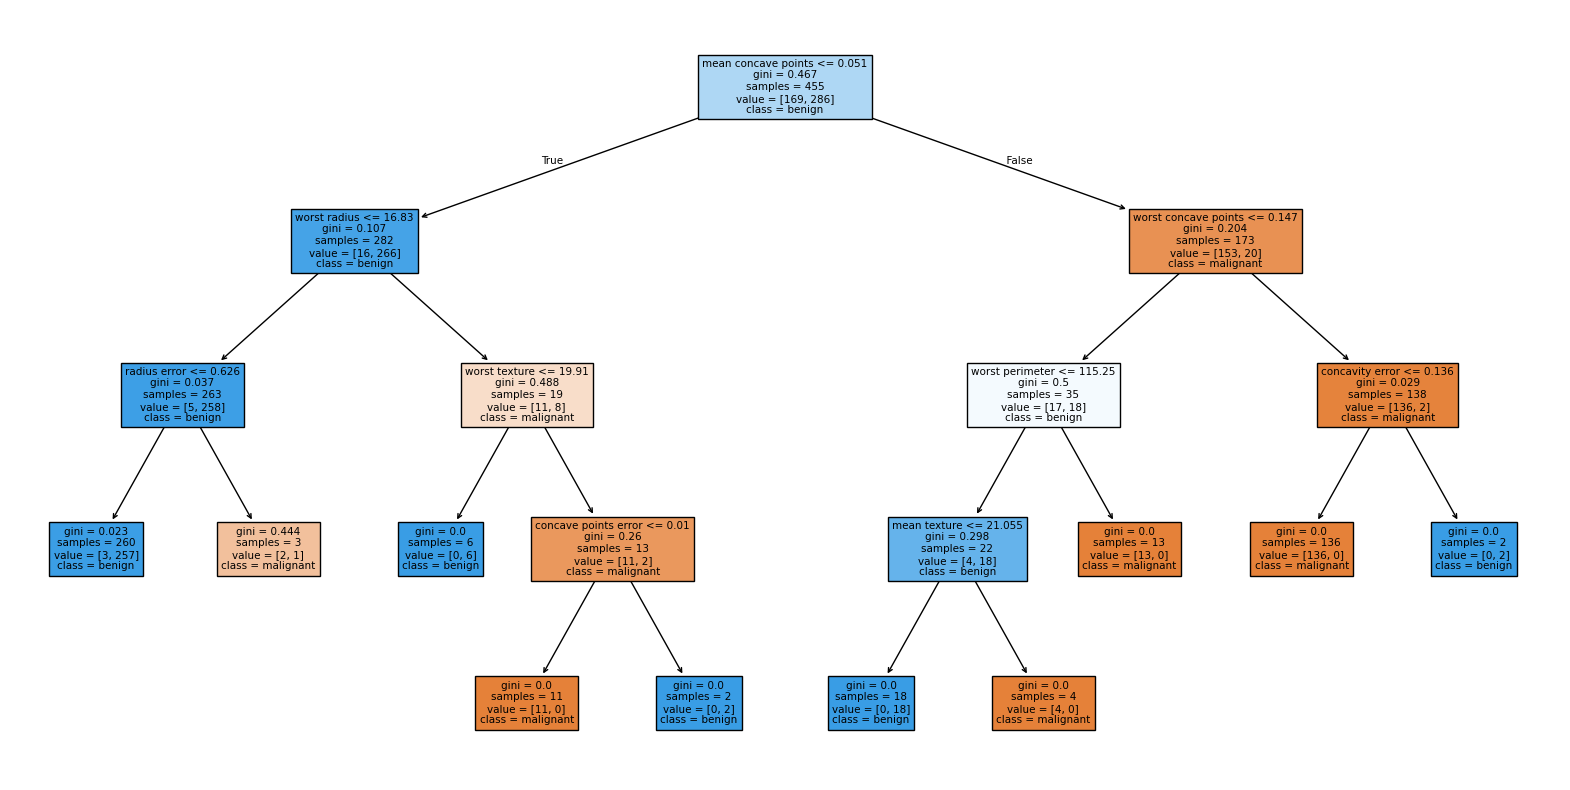

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree model with default parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()



# Iterate: Change max_depth to 3
clf_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_depth, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

# Iterate: Change max_leaf_nodes to 10
clf_leaves = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
clf_leaves.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf_leaves, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load example training data
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Print feature importance from largest to smallest
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


In [3]:
# another way using numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load example training data
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Print feature importance from largest to smallest
indices = np.argsort(importances)[::-1]
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

petal width (cm): 0.4340
petal length (cm): 0.4173
sepal length (cm): 0.1041
sepal width (cm): 0.0446


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Build and train an AdaBoostClassifier using a decision tree of max_depth=1
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_clf.fit(X_train, y_train)

# Evaluate models
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# AdaBoost
ada_pred = ada_clf.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"AdaBoost Accuracy: {ada_acc:.4f}")

# You can experiment by changing n_estimators, max_depth, etc. to see how

Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
AdaBoost Accuracy: 1.0000
